In [6]:
import obspy
from obspy import read, read_inventory
from obspy.io.sac.sactrace import SACTrace
from obspy.io.sac.util import get_sac_reftime
import os
import glob
import numpy
from shutil import move

In [7]:
data_sac = './Download/SAC'
sta_dir = './Download/stations'

In [12]:
### remove the waveforms whose npts are not the same for 3 components.
#index_error_count = 0
total_runs = len(os.listdir(data_sac))
run_num =0
if not os.path.exists(data_sac):
    print("Missing File: %s" % data_sac)
    os.sys.exit()

for ev in os.listdir(data_sac):
        #print(ev)
        run_num +=1
        print(f"run {run_num} of {total_runs}")
        inpath = os.path.join(data_sac, ev)
        if len(glob.glob(f"{inpath}/*.SAC.bp.cut")) == 0:
            continue
        else:            
            funiq = []
            for sac in glob.glob(f"{inpath}/*.SAC.bp.cut"):
                st = obspy.read(sac)
                funiq.append("{}.{}.{}".format(st[0].stats.network,st[0].stats.station,st[0].stats.location))
            fU = sorted(set(funiq))

            index_error_count = 0
            for sacfile in fU:
                
                sacfile_num = len(fU)
                st = obspy.read(f"{inpath}/{sacfile}*.SAC.bp.cut")
                try: 
                    if (st[0].stats.sac.npts != st[1].stats.sac.npts or st[0].stats.sac.npts != st[2].stats.sac.npts or 
                        st[1].stats.sac.npts != st[2].stats.sac.npts):
                        print(st, "Waveforms' npts are inconsistent!")
                        for file in glob.glob(f"{inpath}/{sacfile}*.SAC.bp.cut"):
                            os.remove(file)
                except:
                    #print(st)
                    #print(len(st))
                    index_error_count +=1
            print(f"index error count: {index_error_count} // {sacfile_num}")
                

run 1 of 514
index error count: 3 // 32
run 2 of 514
index error count: 14 // 94
run 3 of 514
index error count: 42 // 225
run 4 of 514
index error count: 4 // 57
run 5 of 514
index error count: 16 // 107
run 6 of 514
index error count: 3 // 48
run 7 of 514
index error count: 12 // 100
run 8 of 514
index error count: 3 // 46
run 9 of 514
index error count: 26 // 151
run 10 of 514
index error count: 36 // 179
run 11 of 514
index error count: 8 // 64
run 12 of 514
index error count: 14 // 92
run 13 of 514
index error count: 6 // 54
run 14 of 514
index error count: 46 // 222
run 15 of 514
index error count: 14 // 72
run 16 of 514
index error count: 11 // 79
run 17 of 514
index error count: 29 // 195
run 18 of 514
index error count: 11 // 78
run 19 of 514
index error count: 14 // 109
run 20 of 514
index error count: 6 // 92
run 21 of 514
index error count: 8 // 88
run 22 of 514
index error count: 36 // 191
run 23 of 514
index error count: 33 // 182
run 24 of 514
index error count: 10 // 75

KeyboardInterrupt: 

In [ ]:
### Rotate from 12Z to ENZ coordnate
total_runs = len(os.listdir(data_sac))
run_num =0
if not os.path.exists(data_sac):
    print("Missing File: %s" % data_sac)
    os.sys.exit()

for ev in os.listdir(data_sac):
        #print(ev)
        run_num +=1
        if run_num% 10 == 0:
            print(f"run {run_num} of {total_runs}")
            
        inpath = os.path.join(data_sac, ev)
        #what is this 12?
        if len(glob.glob(f"{inpath}/*[12].SAC.bp.cut")) == 0:
            continue
        else:            
            funiq = []
            for sac in glob.glob(f"{inpath}/*[12].SAC.bp.cut"):
                st = obspy.read(sac)
                funiq.append("{}.{}.{}".format(st[0].stats.network,st[0].stats.station,st[0].stats.location))
            fU = sorted(set(funiq))

            for sacfile in fU:
                st = obspy.read(f"{inpath}/{sacfile}*[12Z].SAC.bp.cut")
                #print(st)
                
                name = "{}.{}".format(st[0].stats.network,st[0].stats.station)
                inv = read_inventory(f"{sta_dir}/{name}.xml")
                st_rotate = st.rotate('->ZNE',inventory=inv)
                #print(st_rotate[0].stats.channel,st_rotate[1].stats.channel,st_rotate[2].stats.channel)
                sacf0 = "{}.{}.SAC.bp.cut".format(sacfile,st_rotate[0].stats.channel)
                sacf1 = "{}.{}.SAC.bp.cut".format(sacfile,st_rotate[1].stats.channel)
                sacf2 = "{}.{}.SAC.bp.cut".format(sacfile,st_rotate[2].stats.channel)
                st_rotate[0].write(f"{inpath}/{sacf0}", format="SAC")
                st_rotate[1].write(f"{inpath}/{sacf1}", format="SAC")
                st_rotate[2].write(f"{inpath}/{sacf2}", format="SAC")

In [15]:
### Rotate from ENZ to RTZ coordnate
total_runs = len(os.listdir(data_sac))
run_num =0
if not os.path.exists(data_sac):
    print("Missing File: %s" % data_sac)
    os.sys.exit()

for ev in sorted(os.listdir(data_sac)):
#for ev in sorted(glob.glob(f"{data_sac}/NC.NSM")):
    #print(ev)
    run_num +=1
    print(f"run {run_num} of {total_runs}")
    inpath = os.path.join(data_sac, ev)
    
    funiq = []
    for sac in glob.glob(f"{inpath}/*[NEZ].SAC.bp.cut"):
        st = obspy.read(sac)
        funiq.append("{}.{}.{}".format(st[0].stats.network,st[0].stats.station,st[0].stats.location))
    fU = sorted(set(funiq))
    
    index_error_count = 0
    for sacfile in fU:
        st = obspy.read(f"{inpath}/{sacfile}*[NEZ].SAC.bp.cut")
       # print(st)

        baz = st[0].stats.sac["baz"]
        st_rotate = st.rotate('NE->RT', back_azimuth=baz)
        ## print(st_rotate)
        
        sacfile_num = len(fU)
        try:
            sacf0 = "{}.{}.SAC.bp.cut".format(sacfile,st_rotate[0].stats.channel)
            sacf1 = "{}.{}.SAC.bp.cut".format(sacfile,st_rotate[1].stats.channel)
            sacf2 = "{}.{}.SAC.bp.cut".format(sacfile,st_rotate[2].stats.channel)
            st_rotate[0].write(f"{inpath}/{sacf0}", format="SAC")
            st_rotate[1].write(f"{inpath}/{sacf1}", format="SAC")
            st_rotate[2].write(f"{inpath}/{sacf2}", format="SAC")
        except:
            index_error_count +=1
    print(f"index error count: {index_error_count} // {sacfile_num}")
                

run 1 of 514
index error count: 3 // 32
run 2 of 514
index error count: 14 // 94
run 3 of 514
index error count: 42 // 225
run 4 of 514
index error count: 4 // 57
run 5 of 514
index error count: 16 // 107
run 6 of 514
index error count: 3 // 48
run 7 of 514
index error count: 12 // 100
run 8 of 514
index error count: 3 // 46
run 9 of 514
index error count: 26 // 151
run 10 of 514
index error count: 36 // 179
run 11 of 514
index error count: 8 // 64
run 12 of 514
index error count: 14 // 92
run 13 of 514
index error count: 6 // 54
run 14 of 514
index error count: 46 // 222
run 15 of 514
index error count: 14 // 72
run 16 of 514
index error count: 11 // 79
run 17 of 514
index error count: 29 // 195
run 18 of 514
index error count: 11 // 78
run 19 of 514
index error count: 14 // 109
run 20 of 514
index error count: 6 // 92
run 21 of 514
index error count: 8 // 88
run 22 of 514
index error count: 36 // 191
run 23 of 514
index error count: 33 // 182
run 24 of 514
index error count: 10 // 75

index error count: 4 // 48
run 195 of 514
index error count: 15 // 123
run 196 of 514
index error count: 11 // 96
run 197 of 514
index error count: 19 // 149
run 198 of 514
index error count: 12 // 87
run 199 of 514
index error count: 13 // 99
run 200 of 514
index error count: 8 // 72
run 201 of 514
index error count: 15 // 157
run 202 of 514
index error count: 14 // 105
run 203 of 514
index error count: 12 // 84
run 204 of 514
index error count: 1 // 16
run 205 of 514
index error count: 14 // 140
run 206 of 514
index error count: 5 // 61
run 207 of 514
index error count: 12 // 90
run 208 of 514
index error count: 12 // 85
run 209 of 514
index error count: 25 // 178
run 210 of 514
index error count: 7 // 85
run 211 of 514
index error count: 6 // 68
run 212 of 514
index error count: 5 // 54
run 213 of 514
index error count: 17 // 128
run 214 of 514
index error count: 3 // 33
run 215 of 514
index error count: 8 // 57
run 216 of 514
index error count: 11 // 107
run 217 of 514
index error 

index error count: 19 // 121
run 387 of 514
index error count: 17 // 113
run 388 of 514
index error count: 6 // 74
run 389 of 514
index error count: 10 // 81
run 390 of 514
index error count: 15 // 128
run 391 of 514
index error count: 35 // 237
run 392 of 514
index error count: 14 // 133
run 393 of 514
index error count: 22 // 161
run 394 of 514
index error count: 9 // 80
run 395 of 514
index error count: 37 // 203
run 396 of 514
index error count: 10 // 93
run 397 of 514
index error count: 48 // 274
run 398 of 514
index error count: 11 // 104
run 399 of 514
index error count: 5 // 53
run 400 of 514
index error count: 0 // 53
run 401 of 514
index error count: 9 // 73
run 402 of 514
index error count: 10 // 63
run 403 of 514
index error count: 2 // 25
run 404 of 514
index error count: 0 // 17
run 405 of 514
index error count: 2 // 26
run 406 of 514
index error count: 4 // 46
run 407 of 514
index error count: 5 // 40
run 408 of 514
index error count: 0 // 40
run 409 of 514
index error c

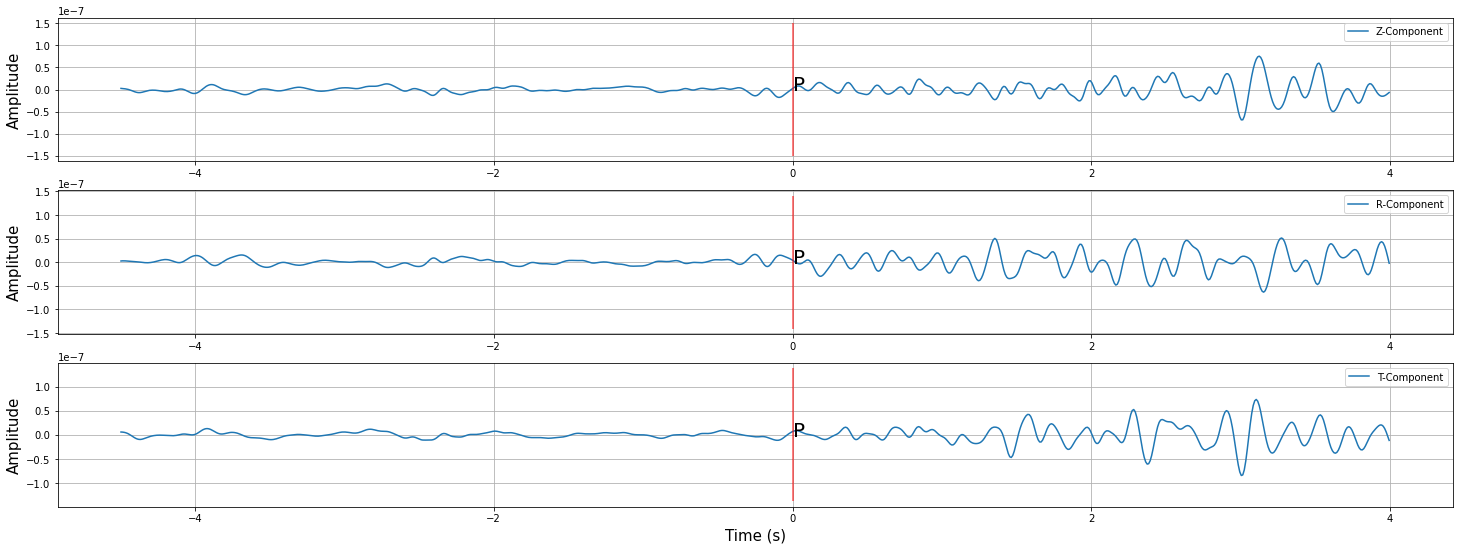

In [26]:
# Quick waveform check
from obspy import read
from obspy.io.sac import SACTrace 
import matplotlib.pyplot as plt
import numpy as np

wtdir="./Download/SAC"
evt = "20220102001614080"
st = read(f"{wtdir}/{evt}/AZ.LVA2..BHE.SAC.bp.cut")
st1 = read(f"{wtdir}/{evt}/AZ.LVA2..BHR.SAC.bp.cut")
st2 = read(f"{wtdir}/{evt}/AZ.LVA2..BHT.SAC.bp.cut")

truncation = 4

t = np.arange(st[0].stats.sac.b, st[0].stats.npts / st[0].stats.sampling_rate + st[0].stats.sac.b, st[0].stats.delta)
truncated_t = t[3*850:truncation*850]
#print(len(t))

plt.figure(figsize=(25,9))
plt.subplot(311)
#plt.plot(t,st[0].data,label="Z-Component")
truncated_data0 = st[0].data[3*850:truncation*850]

plt.plot(truncated_t,truncated_data0,label="Z-Component")
#first-P arrival
plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(st[0].data)*0.5, max(st[0].data)*0.5], color="red", alpha=0.5, linewidth=2)
plt.text(st[0].stats.sac.t1, -1*max(st[0].data)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.grid()

plt.subplot(312)
#plt.plot(t,st1[0].data,label="R-Component")
truncated_data1 = st1[0].data[3*850:truncation*850]
plt.plot(truncated_t,truncated_data1,label="R-Component")

plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(st1[0].data)*0.5, max(st1[0].data)*0.5], color="red", alpha=0.5, linewidth=2)
plt.text(st[0].stats.sac.t1, -1*max(st1[0].data)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.grid()

plt.subplot(313)
#plt.plot(t,st2[0].data,label="T-Component")
truncated_data2 = st2[0].data[3*850:truncation*850]
plt.plot(truncated_t ,truncated_data2,label="T-Component")

plt.plot([st[0].stats.sac.t1, st[0].stats.sac.t1], [-1*max(st2[0].data)*0.5, max(st2[0].data)*0.5], color="red", alpha=0.5, linewidth=2)
plt.text(st[0].stats.sac.t1, -1*max(st2[0].data)*0.01, 'P', fontsize=20)
plt.legend()
plt.ylabel("Amplitude",fontsize=15)
plt.xlabel("Time (s)",fontsize=15)
plt.grid()

plt.show()